# Extracción de datos web

## Índice
1. [Navegador web en Python (socket)](#socket)
2. [Recepción de páginas web con urllib](#urllib)
3. [Parsing de HTML mediante BeatifulSoup](#bea)
4. [Ejemplos de web scraping](#ejemplos)
5. [Web scraping con selenium](#sele)

<a id="socket"></a>
## Navegador web en Python (socket)

Vamos a crear nuestro primer navegador web utilizando el protocolo HTTP, realizando una conexión a un servidor web siguiendo las reglas de este protocolo para solicitar un documento y mostrar lo que el servidor nos devuelve. El documento al que accederemos se encuentra en la página web https://www.w3.org/Graphics/GIF/spec-gif89a.txt

In [1]:
import socket

mysock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
mysock.connect(('www.w3.org', 80))
cmd = 'GET https://www.w3.org/Graphics/GIF/spec-gif89a.txt HTTP/1.0\r\n\r\n'.encode()
mysock.send(cmd)

while True:
    data = mysock.recv(512)
    if len(data) < 1:
        break
    print(data.decode(),end='')

mysock.close()

HTTP/1.1 200 OK
date: Wed, 26 Oct 2022 16:54:39 GMT
last-modified: Tue, 17 Jan 1995 22:26:07 GMT
etag: "1443b-2ced90c89bdc0"
accept-ranges: bytes
content-length: 83003
cache-control: max-age=21600
expires: Wed, 26 Oct 2022 22:54:39 GMT
vary: Accept-Encoding,upgrade-insecure-requests
keep-alive: timeout=5, max=2000
content-type: text/plain
x-backend: www-mirrors
x-request-id: 6359664fdc8ebe16
connection: close





    Cover Sheet for the GIF89a Specification


    DEFERRED CLEAR CODE IN LZW COMPRESSION

    There has been confusion about where clear codes can be found in the
    data stream.  As the specification says, they may appear at anytime.  There
    is not a requirement to send a clear code when the string table is full.

    It is the encoder's decision as to when the table should be cleared.  When
    the table is full, the encoder can chose to use the table as is, making no
    changes to it until the encoder chooses to clear it.  The encoder during
    this time sends out c

  4  |               |       Transparent Color Index       Byte
     +---------------+

     +---------------+
  0  |               |       Block Terminator              Byte
     +---------------+


      <Packed Fields>  =     Reserved                      3 Bits
                             Disposal Method               3 Bits
                             User Input Flag               1 Bit
                             Transparent Color Flag        1 Bit

            i) Extension Introducer - Identifies the beginning of an extension







                                                                        16


            block. This field contains the fixed value 0x21.

            ii) Graphic Control Label - Identifies the current block as a
            Graphic Control Extension. This field contains the fixed value
            0xF9.

            iii) Block Size - Number of bytes in the block, after the Block
            Size field and up to but not including the Block Termina

Primero, el programa realiza una conexión al puerto 80 del servidor www.w3.org. Como nuestro programa está asumiendo el rol de "navegador web", el protocolo HTTP nos dice que tenemos que enviar el comando GET seguido por una línea en blanco. `\r\n` significa un final de línea, y `\r\n\r\n` es el equivalente a la línea en blanco.

<a id="urllib"></a>
## Recepción de páginas web con urllib

In [6]:
import urllib.request
f = urllib.request.urlopen('https://www.thebridge.tech')
print(f.read().decode())

<!DOCTYPE html><!-- Last Published: Wed Oct 26 2022 14:35:38 GMT+0000 (Coordinated Universal Time) --><html data-wf-domain="www.thebridge.tech" data-wf-page="6336cf7720a00a19f58a80fe" data-wf-site="60780bff57ddc42a6adc1d7e" lang="es"><head><meta charset="utf-8"/><title>The Bridge | Digital Talent Accelerator</title><meta content="Da un giro a tu carrera con The Bridge: bootcamps para aprender programación, diseño o análisis de datos. Tu pasión por aprender es nuestro motor." name="description"/><meta content="The Bridge | Digital Talent Accelerator" property="og:title"/><meta content="Da un giro a tu carrera con The Bridge: bootcamps para aprender programación, diseño o análisis de datos. Tu pasión por aprender es nuestro motor." property="og:description"/><meta content="The Bridge | Digital Talent Accelerator" property="twitter:title"/><meta content="Da un giro a tu carrera con The Bridge: bootcamps para aprender programación, diseño o análisis de datos. Tu pasión por aprender es nues

Cuando el programa se ejecuta, en su salida sólo vemos el contenido del fichero. Las cabeceras siguen enviándose, pero el código de `urllib` se queda con ella y sólo nos devuelve los datos. Una vez abierta la página web, se puede leer como si fuese un archivo local.  
¿Qué ocurre si cambiamos el txt por otra página web?

Puede ocurrir que urllib devuelva un error de fallo en la verificación del certificado SSL:  

`urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed`

SSL (*Secure Sockets Layer*) es un certificado que asegura que una página web es de confianza. 

Para ignorar la autenticación de certificado SSL no verificado en urllib tenemos dos opciones:

In [7]:
import ssl
import urllib.request
context = ssl._create_unverified_context()

urllib.request.urlopen('https://www.elpais.com',context=context).read().decode()

'<!DOCTYPE html><html lang="es-ES"><head><link rel="preconnect" href="//static.elpais.com"/><link rel="preconnect" href="//ep00.epimg.net"/><link rel="preconnect" href="//imagenes.elpais.com"/><link rel="preload" as="script" href="//ep00.epimg.net/js/prisa/user.min.js?i=1"/><link rel="preconnect" href="//www.googletagservices.com"/><link rel="preconnect" href="//ping.chartbeat.net"/><link rel="preconnect" href="//cdn.krxd.net"/><link rel="preconnect" href="//assets.adobedtm.com"/><link rel="preload" href="https://static.elpais.com/dist/resources/fonts/majrit/majrit-text/Majrit-Text-Bold.woff2" as="font" type="font/woff2" crossorigin=""/><link rel="preload" href="https://static.elpais.com/dist/resources/fonts/majrit/majrit-text/Majrit-Text-Roman.woff2" as="font" type="font/woff2" crossorigin=""/><link rel="preload" href="https://static.elpais.com/dist/resources/fonts/marcin-ant-b/marcinantb-regular-webfont.woff2" as="font" type="font/woff2" crossorigin=""/><link rel="preload" href="http

In [8]:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

<a id="bea"></a>
## Parsing de HTML mediante BeatifulSoup

BeautifulSoup es una librería de Python que permite analizar documentos HTML y extraer datos de ellos, compensando imperfecciones que puedan existir. Para instalar esta librería escribimos en anaconda Prompt:  
`conda install -c anaconda beautifulsoup4`

Esta librería permite, por ejemplo, extraer los atributos href de las etiquetas de anclaje (a)  
<img src='http://www.cellbiol.com/bioinformatics_web_development/wp-content/uploads/2017/01/attributes_and_values_in_the_a_tag.png'>  
En el siguiente ejemplo, vamos a parsear una entrada HTML y extraer los links utilizando la librería BeautifulSoup. 
Utilizaremos urllib para leer la página y después BeautifulSoup para extraer los atributos href de las etiquetas de tipo ancla (a)

In [15]:
import urllib.request
from bs4 import BeautifulSoup
url = 'https://thebridge.tech'
html = urllib.request.urlopen(url)
soup = BeautifulSoup(html)

tags = soup('a')
for tag in tags:
    print(tag.get('href'))

/
/bootcamp/bootcamps-full-time
/bootcamps/bootcamp-ciberseguridad
/bootcamps/bootcamp-cloud-devops
/bootcamps/bootcamp-data-science
/bootcamps/bootcamp-fullstack-developer
/bootcamps/bootcamp-marketing-digital
/bootcamps/bootcamp-product-design
/bootcamp/bootcamps-part-time
/bootcamps/ciberseguridad-part-time
/bootcamps/cloud-devops-pt
/bootcamps/data-science-part-time
/bootcamps/desarrollo-web-full-stack-part-time
/bootcamps/marketing-digital-part-time
/bootcamps/ux-ui-product-design-part-time
https://www.eventbrite.es/o/the-bridge-digital-talent-accelerator-26763007783
/campus/bilbao
/campus/madrid
/campus/valencia
/campus/sevilla
/campus/online
/financiacion-becas/financiacion-becas
/financiacion-becas/income-share-agrement-isa
/empresas-intituciones/soluciones-empresas
/empresas-intituciones/servicios-universidades-instituciones-educativas
/empresas-intituciones/contrata-nuestros-graduados
/empleabilidad
/sobre-nosotros/quienes-somos
/sobre-nosotros/por-que-the-bridge
/sobre-nosot

Podemos extraer más campos de las etiquetas

In [16]:
for tag in tags:
    print('URL:',tag.get('href'))
    print('Texto:',tag.text)
    print('Atributos',tag.attrs)
    print('\r')

URL: /
Texto: 
Atributos {'href': '/', 'aria-current': 'page', 'class': ['brand-2', 'w-nav-brand', 'w--current']}

URL: /bootcamp/bootcamps-full-time
Texto: Bootcamps Full Time
Atributos {'href': '/bootcamp/bootcamps-full-time', 'class': ['link']}

URL: /bootcamps/bootcamp-ciberseguridad
Texto: Ciberseguridad
Atributos {'href': '/bootcamps/bootcamp-ciberseguridad', 'class': ['link-header', 'link-header-hover']}

URL: /bootcamps/bootcamp-cloud-devops
Texto: Cloud & DevOps
Atributos {'href': '/bootcamps/bootcamp-cloud-devops', 'class': ['link-header', 'link-header-hover']}

URL: /bootcamps/bootcamp-data-science
Texto: Data Science
Atributos {'href': '/bootcamps/bootcamp-data-science', 'class': ['link-header', 'link-header-hover']}

URL: /bootcamps/bootcamp-fullstack-developer
Texto: Desarrollo Web Full Stack
Atributos {'href': '/bootcamps/bootcamp-fullstack-developer', 'class': ['link-header', 'link-header-hover']}

URL: /bootcamps/bootcamp-marketing-digital
Texto: Marketing Digital
Atri

Puedes encontrar la documentación de beautifulsoup en https://www.crummy.com/software/BeautifulSoup/bs4/doc/

<a id="ejemplos"></a>
## Ejemplos de web scraping

### 1. Frecuencia de las palabras de un discurso  
Vamos a obtener la frecuencia de las palabras del siguiente discurso: https://elpais.com/internacional/2018/01/31/actualidad/1517387619_036241.html

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [51]:
import urllib.request
from bs4 import BeautifulSoup

url = 'https://elpais.com/internacional/2018/01/31/actualidad/1517387619_036241.html'
html = urllib.request.urlopen(url)
soup2 = BeautifulSoup(html)
tags = soup2('p')

discurso = ''
for tag in tags:
    if len(tag.attrs)==1 and 'Traducción de New Clips' not in tag.text:
        discurso += tag.text

contadores = {} 
discurso = discurso.replace(',',' ')\
                   .replace('.',' ')\
                   .replace(':',' ')\
                   .replace('?',' ')\
                   .replace('"','')

palabras = discurso.lower().replace('estados unidos','EEUU').split()

for palabra in palabras:
    if len(palabra)>3 and palabra not in ['esta','para','este','estos','esos']:
        contadores[palabra] = contadores.get(palabra,0) + 1
        
import pandas as pd
df = pd.DataFrame(list(contadores.items()),columns =['palabra','contador'])
df.sort_values('contador',ascending=False)

,palabra,contador
11,estadounidenses,33
28,nuestro,28
542,nuestros,28
54,hemos,27
338,nuestra,27
...,...,...
767,rendición,1
766,riqueza,1
765,llevaban,1
763,sacrificaban,1


### 2. Web Scraping de bitcoin
Extraemos el valor más reciente de Bitcoin en https://www.estrategiasdeinversion.com/cotizaciones/criptomonedas/bitcoin

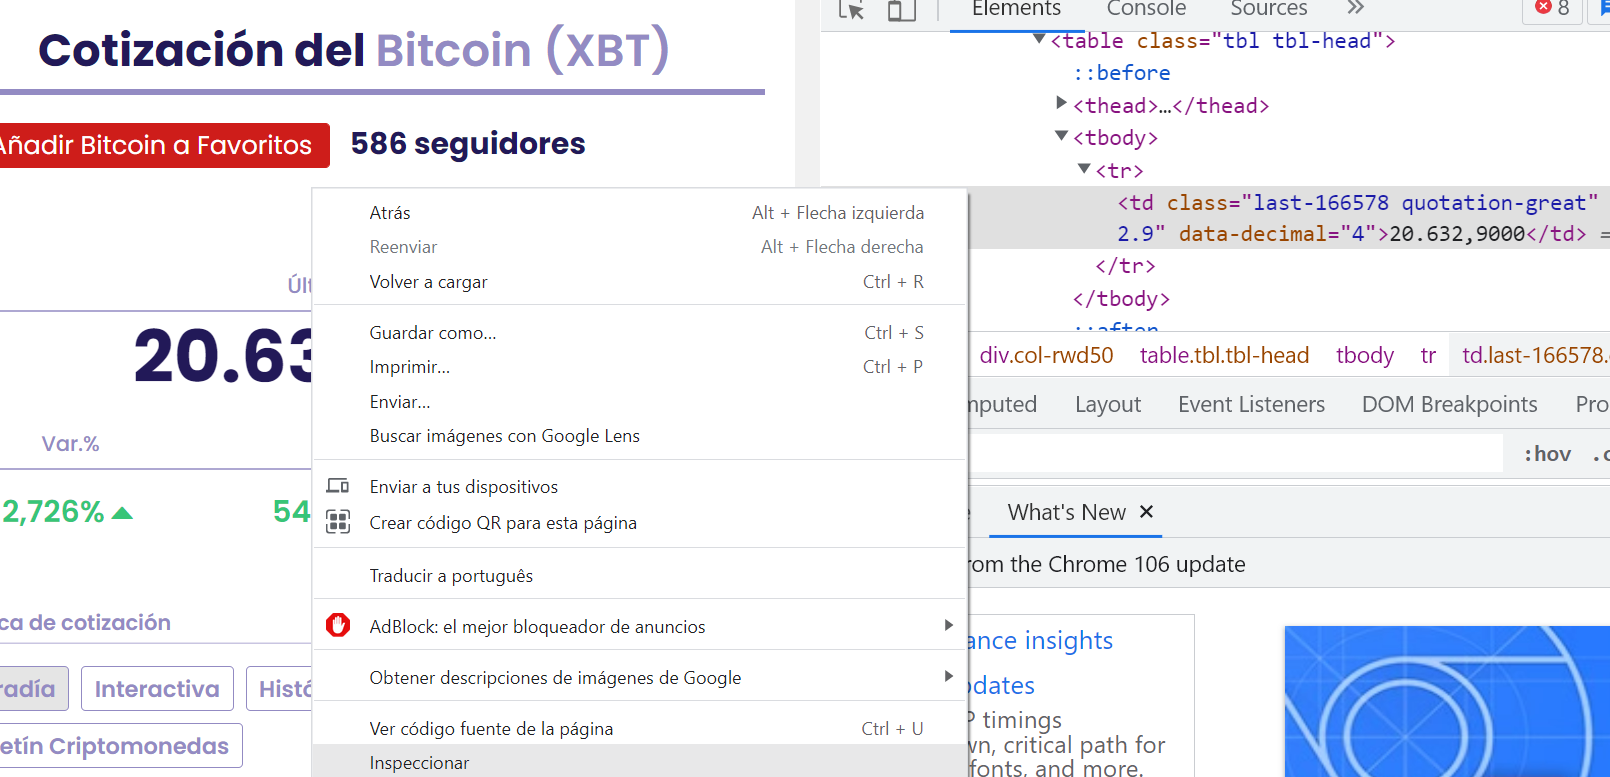

In [1]:
import urllib.request
from bs4 import BeautifulSoup

url = 'https://www.estrategiasdeinversion.com/cotizaciones/criptomonedas/bitcoin'
html = urllib.request.urlopen(url)
soup = BeautifulSoup(html)

tags = soup.find_all('td', class_='last-166578 quotation-great')
float(tags[0].text.replace('.','').replace(',','.'))

20662.1

In [74]:
tags2 = soup.find_all('div',class_='varPerc-166578')
float(tags2[0].text.replace('%','').replace(' ','').replace(',','.'))

3.823

### 3. Web scraping con pandas 

La función `read_html()` de pandas también permite extraer tablas de páginas web, devolviendo una lista de dataframes con todas las tablas que existan.  
Por ejemplo, vamos a hacer scraping de la siguiente tabla: https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/

Es necesario instalar la librería `lxml`: `conda install -c conda-forge lxml`

In [ ]:
!pip install lxml

In [78]:
import pandas as pd
url = 'https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/'
tablas = pd.read_html(url)
tablas[0]

,Bank NameBank,CityCity,StateSt,CertCert,Acquiring InstitutionAI,Closing DateClosing,FundFund
0,Almena State Bank,Almena,KS,15426,Equity Bank,"October 23, 2020",10538
1,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb","October 16, 2020",10537
2,The First State Bank,Barboursville,WV,14361,"MVB Bank, Inc.","April 3, 2020",10536
3,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,"February 14, 2020",10535
4,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,"November 1, 2019",10534
...,...,...,...,...,...,...,...
558,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB","July 27, 2001",6004
559,Malta National Bank,Malta,OH,6629,North Valley Bank,"May 3, 2001",4648
560,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,"February 2, 2001",4647
561,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,"December 14, 2000",4646


### 4. Agente de usuario

El **agente de usuario** es un identificador con el que un programa inicia sesión en el servidor web para solicitar datos

Cuando un usuario accede a una página web, la aplicación generalmente envía una cadena de texto que identifica al agente de usuario ante el servidor. Este texto forma parte de la petición a través de HTTP, llevando como prefijo
*User-Agent*, y generalmente incluye información como el nombre de la aplicación, la versión, el sistema operativo, y el idioma. 

La identificación de agente de usuario es uno de los criterios de exclusión utilizado para impedir el acceso a ciertas secciones de un sitio web.

Ejemplo: Obtenemos la altura de los futbolistas desde la web de transfermarkt:  
https://www.transfermarkt.es/lionel-messi/profil/spieler/28003


In [81]:
import urllib.request
from bs4 import BeautifulSoup
url = 'https://www.transfermarkt.es/lionel-messi/profil/spieler/28003'
req = urllib.request.Request(
    url, 
    data=None, 
    headers={
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
    }
)

f = urllib.request.urlopen(req)
soup = BeautifulSoup(f)
tags = soup.find_all(attrs={"itemprop":"height"})
altura = float(tags[0].text.replace(' m','').replace(',','.'))
altura

1.7

## <span style="color:red">Do it yourself</span>

Obtén los equipos que hayan ganado LaLiga en los últimos 4 años con su puntuación a partir de la siguiente URL: https://resultados.as.com/resultados/futbol/primera/2021_2022/clasificacion/  

| Temporada | Club        | Puntos |
|-----------|-------------|--------|
| 19/20     | Real Madrid | 87     |
| 18/19     | Barcelona   | 87     |
| ...       | ...         | ...    |

In [95]:
import pandas as pd

df = pd.DataFrame()

for temp in range(18,22):
    temporada = '20' + str(temp) + '_' + '20' + str(temp+1)
    url = 'https://resultados.as.com/resultados/futbol/primera/'+temporada+'/clasificacion/'
    print(url)
    tablas = pd.read_html(url)
    table = tablas[0]
    equipo = table.iloc[0,0].replace('1','').strip()
    puntos = table.iloc[0,1]

    df_temp = pd.DataFrame({'Temporada':[temporada],
                            'Club':[equipo],
                            'Puntos':[puntos]
                           })
    df = pd.concat([df,df_temp],axis=0)

df.reset_index(drop=True)

https://resultados.as.com/resultados/futbol/primera/2018_2019/clasificacion/
https://resultados.as.com/resultados/futbol/primera/2019_2020/clasificacion/
https://resultados.as.com/resultados/futbol/primera/2020_2021/clasificacion/
https://resultados.as.com/resultados/futbol/primera/2021_2022/clasificacion/


,Temporada,Club,Puntos
0,2018_2019,Barcelona,87
1,2019_2020,Real Madrid,87
2,2020_2021,Atlético,86
3,2021_2022,Real Madrid,86


## <span style="color:red">Do it yourself</span>
Extrae el precio de la leche Pascual entera de 1L en Carrefour

In [2]:
import urllib.request
from bs4 import BeautifulSoup
url = 'https://www.carrefour.es/supermercado/leche-entera-pascual-brik-1-l/R-521006986/p?ic_source=portal-y-corporativo&ic_medium=search-empathy&ic_content=ns'
html = urllib.request.urlopen(url)
soup = BeautifulSoup(html)
tags = soup.find_all('span',class_='buybox__price')
precio = float(tags[0].text.strip().replace(' €','').replace(',','.'))
precio

1.19

Intenta extraer el precio de alguno de estos productos: https://tienda.mercadona.es/search-results?query=leche%20entera

In [100]:
url = 'https://tienda.mercadona.es/search-results?query=leche%20entera'
html = urllib.request.urlopen(url)
soup = BeautifulSoup(html)
tags = soup.find_all('p',class_='product-price__unit-price subhead1-b')
tags

[]

<a id="sele"></a>
## Web Scraping con Selenium

Selenium es una librería que permite automatizar navegadores web

Documentación: https://selenium-python.readthedocs.io/

Instalar librerías `selenium` y `webdriver_manager`

In [3]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
import time

In [4]:
driver = webdriver.Chrome(executable_path=ChromeDriverManager().install())



====== WebDriver manager ======
Current google-chrome version is 106.0.5249
Get LATEST chromedriver version for 106.0.5249 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/106.0.5249.61/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\rzambrano\.wdm\drivers\chromedriver\win32\106.0.5249.61]


### Ejemplo 1: Introducir una búsqueda en la web de carrefour y extraer el precio de los productos

In [5]:
# Accedemos a la web
driver.get('https://www.carrefour.es')

In [6]:
# Aceptar cookies
driver.find_element('xpath', '//*[@id="onetrust-accept-btn-handler"]').click()

In [7]:
# Buscar producto
driver.find_element('xpath','//*[@id="search-input"]').click()

In [8]:
driver.find_element('xpath','//*[@id="empathy-x"]/header/div/div/input[3]').send_keys('Leche Pascual')

In [9]:
# Extraer el HTML
html = driver.page_source

In [10]:
soup = BeautifulSoup(html)
productos = soup.find_all('h1', class_='ebx-result-title ebx-result__title')
lista_productos = []
for producto in productos:
    lista_productos.append(producto.text)
    
lista_productos

['Leche entera Pascual brik 1 l.',
 'Leche desnatada Pascual sin lactosa brik 1 l.',
 'Leche entera Pascual botella 1,5 l.',
 'Leche desnatada 0% MG Pascual botella 1,5 l.',
 'Leche semidesnatada Pascual sin lactosa brik 1 l.',
 'Leche semidesnatada con calcio Pascual brik 1 l.',
 'Leche entera Pascual pack de 6 briks de 200 ml.',
 'Leche entera Pascual sin lactosa brik 1 l.',
 'Leche entera Salud Pascual brik 1 l.',
 'Leche semidesnatada Salud Pascual brik 1 l.',
 'Leche semidesnatada Pascual botella 1,5 l.',
 'Leche entera con calcio Pascual brik 1 l.',
 'Leche desnatada 0% MG con calcio Pascual brik 1 l.',
 'Leche semidesnatada Pascual sin lactosa pack de 3 briks de 200 ml.']

In [11]:
precios = soup.find_all('strong',class_='ebx-result-price__value')
lista_precios = []
for precio in precios:
    lista_precios.append(precio.text)
lista_precios

['1,19 €',
 '1,49 €',
 '1,79 €',
 '1,79 €',
 '1,49 €',
 '1,59 €',
 '2,59 €',
 '1,49 €',
 '1,49 €',
 '1,49 €',
 '1,79 €',
 '1,59 €',
 '1,59 €',
 '1,45 €']

In [13]:
from datetime import datetime
import pandas as pd
fecha_hoy = datetime.today().strftime('%Y-%m-%d')

df = pd.DataFrame({'Fecha':[fecha_hoy]*len(lista_precios),
                  'Producto':lista_productos,
                  'Precio':lista_precios})
df

,Fecha,Producto,Precio
0,2022-10-28,Leche entera Pascual brik 1 l.,"1,19 €"
1,2022-10-28,Leche desnatada Pascual sin lactosa brik 1 l.,"1,49 €"
2,2022-10-28,"Leche entera Pascual botella 1,5 l.","1,79 €"
3,2022-10-28,"Leche desnatada 0% MG Pascual botella 1,5 l.","1,79 €"
4,2022-10-28,Leche semidesnatada Pascual sin lactosa brik 1 l.,"1,49 €"
5,2022-10-28,Leche semidesnatada con calcio Pascual brik 1 l.,"1,59 €"
6,2022-10-28,Leche entera Pascual pack de 6 briks de 200 ml.,"2,59 €"
7,2022-10-28,Leche entera Pascual sin lactosa brik 1 l.,"1,49 €"
8,2022-10-28,Leche entera Salud Pascual brik 1 l.,"1,49 €"
9,2022-10-28,Leche semidesnatada Salud Pascual brik 1 l.,"1,49 €"


In [14]:
driver.get('https://tienda.mercadona.es')

In [15]:
# Aceptar Cookies
driver.find_element('xpath','//*[@id="root"]/div[1]/div/div/button[2]').click()

In [16]:
# Código Postal
driver.find_element('xpath','//*[@id="root"]/div[4]/div/div[2]/div/form/div/input').send_keys('28043')

In [17]:
# Aceptar el código postal
driver.find_element('xpath','//*[@id="root"]/div[4]/div/div[2]/div/form/button/span').click()

In [18]:
# Cuadro de búsqueda
driver.find_element('xpath','//*[@id="search"]').send_keys('Leche entera')

In [19]:
html = driver.page_source

In [21]:
soup = BeautifulSoup(html)
productos = soup.find_all('h4',class_='subhead1-r product-cell__description-name')
lista_productos = [el.text for el in productos]
lista_productos

['Leche entera Hacendado',
 'Leche entera Hacendado',
 'Leche entera Hacendado',
 'Leche entera Pascual',
 'Leche entera Asturiana',
 'Leche entera Hacendado',
 'Leche entera Asturiana',
 'Leche entera Pascual',
 'Leche entera Hacendado',
 'Leche entera fresca Hacendado',
 'Leche entera sin lactosa Hacendado',
 'Leche entera sin lactosa Hacendado',
 'Leche entera calcio Hacendado',
 'Leche condensada entera Nutricia',
 'Leche entera calcio Hacendado',
 'Leche condensada entera Nutricia',
 'Leche condensada entera Nutricia',
 'Chocolate extrafino con leche Hacendado almendras enteras',
 'Chocolate con leche Valor almendras enteras',
 'Chocolate con leche Valor almendras enteras']

In [24]:
precios = soup.find_all('p',class_='product-price__unit-price subhead1-b')
lista_precios = [tag.text for tag in precios]
lista_precios

['5,10 €',
 '0,85 €',
 '1,49 €',
 '6,54 €',
 '8,94 €',
 '7,80 €',
 '1,49 €',
 '1,09 €',
 '1,30 €',
 '0,97 €',
 '5,58 €',
 '0,93 €',
 '5,40 €',
 '1,25 €',
 '0,90 €',
 '1,50 €',
 '2,20 €',
 '1,35 €',
 '3,15 €',
 '2,85 €']

In [27]:
from datetime import datetime
import pandas as pd
fecha_hoy = datetime.today().strftime('%Y-%m-%d')

df2 = pd.DataFrame({'Fecha':[fecha_hoy]*len(lista_precios),
                  'Producto':lista_productos,
                  'Precio':lista_precios})

df3 = df2.loc[df2.Producto.str.contains('Leche')]
df3

,Fecha,Producto,Precio
0,2022-10-28,Leche entera Hacendado,"5,10 €"
1,2022-10-28,Leche entera Hacendado,"0,85 €"
2,2022-10-28,Leche entera Hacendado,"1,49 €"
3,2022-10-28,Leche entera Pascual,"6,54 €"
4,2022-10-28,Leche entera Asturiana,"8,94 €"
5,2022-10-28,Leche entera Hacendado,"7,80 €"
6,2022-10-28,Leche entera Asturiana,"1,49 €"
7,2022-10-28,Leche entera Pascual,"1,09 €"
8,2022-10-28,Leche entera Hacendado,"1,30 €"
9,2022-10-28,Leche entera fresca Hacendado,"0,97 €"


### Ejemplo 2: Extraer el precio de las entradas de la web del Betis

In [28]:
driver.get('https://www.realbetisbalompie.es/entradas/')

In [29]:
driver.find_element('xpath','//*[@id="qc-cmp2-ui"]/div[2]/div/button[2]').click()

In [30]:
driver.find_element('xpath','//*[@id="main_tag"]/section/ul/li[1]/div[2]/div[2]/a').click()

In [31]:
driver.find_element('xpath','/html/body/div[1]/div/div/div/div[2]/button[2]/span').click()

In [33]:
partido = driver.find_element('xpath','//*[@id="descriptionTab"]/div/div/p[1]').text
partido

'Real Betis Balompié – HJK Helsinki'

In [38]:
entradas = driver.find_element('xpath','//*[@id="grid-body"]').text
entradas

'PREFERENCIA 1º ANFITEATRO - 21205\n110 €\n2 Disponible\nPREFERENCIA 1º ANFITEATRO - 21206\n110 €\n2 Disponible\nPREFERENCIA 1º ANFITEATRO - 21108\n110 €\n3 Disponible\nPREFERENCIA 1º ANFITEATRO - 21103\n110 €\n5 Disponible\nPREFERENCIA 1º ANFITEATRO - 21210\n110 €\n39 Disponible\nPREFERENCIA 1º ANFITEATRO - 21109\n110 €\n3 Disponible\nPREFERENCIA 1º ANFITEATRO - 21208\n110 €\n12 Disponible\nPREFERENCIA 1º ANFITEATRO - 21106\n110 €\n1 Disponible\nPREFERENCIA 1º ANFITEATRO - 21204\n110 €\n4 Disponible\nPREFERENCIA 1º ANFITEATRO - 21102\n110 €\n1 Disponible\nPREFERENCIA 1º ANFITEATRO - 21104\n110 €\n1 Disponible\nPREFERENCIA 1º ANFITEATRO - 21209\n110 €\n19 Disponible\nPREFERENCIA 1º ANFITEATRO - 21207\n110 €\n1 Disponible\nPREFERENCIA 1º ANFITEATRO - 21107\n110 €\n2 Disponible\nPREFERENCIA 1º ANFITEATRO - 21202\n110 €\n1 Disponible\nPREFERENCIA 1º ANFITEATRO - 21203\n110 €\n7 Disponible\nPREFERENCIA TRIBUNA BAJA - 20210\n105 €\n80 Disponible\nPREFERENCIA TRIBUNA BAJA - 20105\n105 €\n5 D

In [43]:
L = entradas.split('\n')
categorias = []
precios = []
disponibles = []

for indice,elem in enumerate(L):
    if '€' in elem:
        precios.append(elem)
        categorias.append(L[indice-1])
        disponibles.append(L[indice+1])

In [47]:
len(categorias),len(precios),len(disponibles)

(162, 162, 162)

In [53]:
betis = pd.DataFrame({'Fecha':[fecha_hoy]*len(categorias),
                      'Partido':[partido]*len(categorias),
                      'Categorias':categorias,
                      'Precios':precios,
                      'Disponibles':disponibles})

#betis.loc[betis.Categorias.str.contains('22215')]
betis

,Fecha,Partido,Categorias,Precios,Disponibles
0,2022-10-28,Real Betis Balompié – HJK Helsinki,PREFERENCIA 1º ANFITEATRO - 21205,110 €,2 Disponible
1,2022-10-28,Real Betis Balompié – HJK Helsinki,PREFERENCIA 1º ANFITEATRO - 21206,110 €,2 Disponible
2,2022-10-28,Real Betis Balompié – HJK Helsinki,PREFERENCIA 1º ANFITEATRO - 21108,110 €,3 Disponible
3,2022-10-28,Real Betis Balompié – HJK Helsinki,PREFERENCIA 1º ANFITEATRO - 21103,110 €,5 Disponible
4,2022-10-28,Real Betis Balompié – HJK Helsinki,PREFERENCIA 1º ANFITEATRO - 21210,110 €,39 Disponible
...,...,...,...,...,...
157,2022-10-28,Real Betis Balompié – HJK Helsinki,GOL SUR 2º ANFITEATRO - 42109,60 €,13 Disponible
158,2022-10-28,Real Betis Balompié – HJK Helsinki,GOL SUR 2º ANFITEATRO - 42106,60 €,15 Disponible
159,2022-10-28,Real Betis Balompié – HJK Helsinki,GOL NORTE 2º ANFITEATRO - 12102,60 €,21 Disponible
160,2022-10-28,Real Betis Balompié – HJK Helsinki,GOL SUR 2º ANFITEATRO - 42104,60 €,8 Disponible


In [54]:
# Guardamos el resultado en una base de datos
import sqlite3
BBDD_BETIS = sqlite3.connect('BBDD_BETIS.sqlite')
betis.to_sql('BETIS',con=BBDD_BETIS,if_exists='append')

162

In [55]:
driver.quit()

### Ejemplo 3: SIAR

[Link al Notebook](./Web%20Scraping%20con%20Selenium(SIAR).ipynb)